# Import Libraries

In [1]:
# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score 

# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Library for visualizing our tree
# If you get an error, run 'conda install python-graphviz' in your terminal
import graphviz 

# Exploratory Data analysis

In [2]:
df = pd.read_csv('data/cumulative.csv')
df.set_index("rowid", inplace = True)
df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
rowid,,,,,,,,,,,,,,,,,,,,,
1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [3]:
df.describe()

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,9564.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,7.690628e+06,0.480829,0.188206,0.231598,0.194898,0.120033,75.671358,0.002148,-0.002148,166.183251,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2.653459e+06,0.476928,0.390897,0.421875,0.396143,0.325018,1334.744046,0.008236,0.008236,67.918960,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,120.515914,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,132.761718,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,137.224595,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,170.694603,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,1.293514e+07,1.000000,1.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,1472.522306,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


In [4]:
#printing the shape of our df
df.shape

(9564, 49)

<AxesSubplot:ylabel='rowid'>

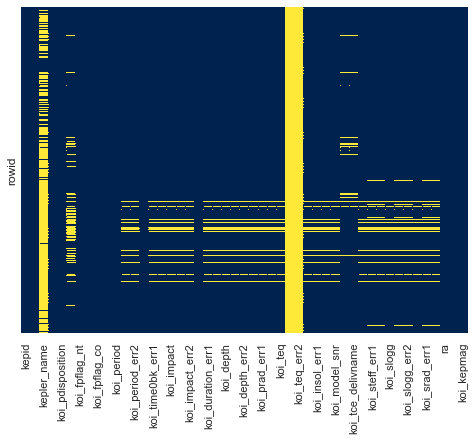

In [5]:
#Using Seaborn to create a heatpmap to see where our missing data is.
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='cividis')

<AxesSubplot:xlabel='koi_disposition', ylabel='count'>

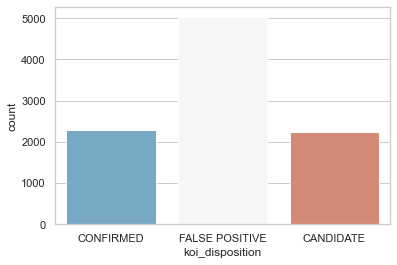

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='koi_disposition', data=df, palette='RdBu_r')

<AxesSubplot:xlabel='koi_disposition', ylabel='count'>

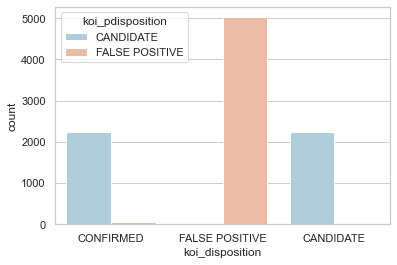

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='koi_disposition',hue='koi_pdisposition', data=df, palette='RdBu_r')

In [8]:
df.shape

(9564, 49)

In [9]:
#dropping kepler_name column
df.drop('kepler_name', inplace=True, axis=1)

In [10]:
# Fill null values with -999
df.fillna(value = 0, inplace = True)
df

,kepid,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
rowid,,,,,,,,,,,,,,,,,,,,,
1,10797460,K00752.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10797460,K00752.02,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
3,10811496,K00753.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
4,10848459,K00754.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
5,10854555,K00755.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,10031643,K07984.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,1,8.589871,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9561,10090151,K07985.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,0.527699,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9562,10128825,K07986.01,CANDIDATE,CANDIDATE,0.497,0,0,0,0,1.739849,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757


In [11]:
#Checking for missing values
df.isnull().sum() 

kepid                0
kepoi_name           0
koi_disposition      0
koi_pdisposition     0
koi_score            0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_teq_err1         0
koi_teq_err2         0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_tce_delivname    0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_er

In [12]:
# Check for Duplicates
df.duplicated().sum()

0

<AxesSubplot:ylabel='rowid'>

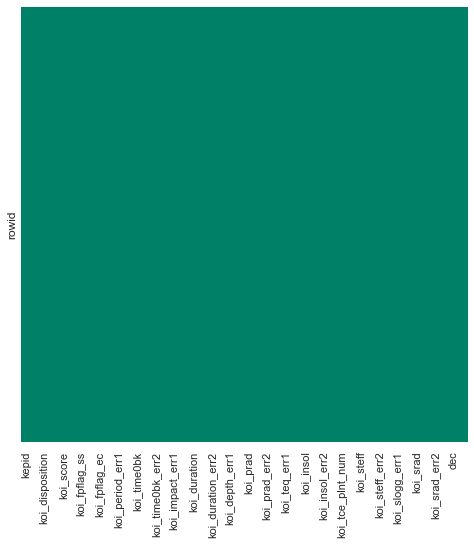

In [13]:
#Using this heatmap for sanity check
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='summer')

In [14]:
df.koi_disposition.value_counts()

FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: koi_disposition, dtype: int64

In [35]:
features = ['koi_score', 'koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co','koi_steff_err1','koi_steff_err2','koi_slogg','koi_slogg_err1','koi_slogg_err2','koi_srad','koi_srad_err1','koi_srad_err2','ra','dec']
df[features]

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec
rowid,,,,,,,,,,,,,,
1,1.000,0,0,0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651
2,0.969,0,0,0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651
3,0.000,0,1,0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129
4,0.000,0,1,0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210
5,1.000,0,0,0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,0.000,0,0,0,169.0,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351
9561,0.000,0,1,1,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819
9562,0.497,0,0,0,165.0,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219


In [16]:
target = ['koi_pdisposition'] 
# Define your X and y variables
X = df[features].values
y = df[target].values

In [17]:
#Splitting our training and testing data
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=55)
print('Lenght of our Training data:', X_train.shape, '\nLength of our Testing data:', y_test.shape)

Lenght of our Training data: (6694, 14) 
Length of our Testing data: (2870, 1)


In [18]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [19]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)
#pd.crosstab(y_test, y_pred)

Accuracy Score: 0.938676


In [20]:
# using SMOTE for imbalance ddata
#from imblearn.over_sampling  import SMOTE
# smote = SMOTE()

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
#X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'), y_train)

In [ ]:
#from collections import Counter
#print("Before SMOTE:",(y_train))
#print("After SMOTE", (y_train_smote))


In [ ]:
#model.fit(X_train_smote,y_train_smote)
#y_pred = model.predict(X_test)
#accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
#print("Accuracy Score: %f" % accuracy)
#pd.crosstab(y_test, y_pred)

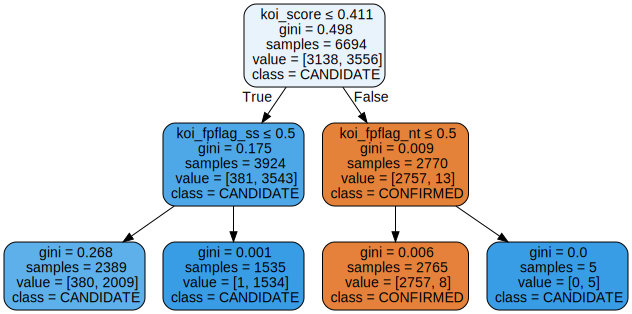

In [21]:
dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=features,
                     class_names=['CONFIRMED','CANDIDATE'],
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [22]:
 #Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search.from sklearn.model_selection import GridSearchCV
params = { 
    'criterion' : ['gini', 'entropy'],
    'max_depth': [5, 7, 9], 
    'min_samples_split': [2, 6, 8]
     }

In [23]:
#Initalize your GridSearchCV with a DecisionTreeClassifier, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
grid_search_cv =  GridSearchCV( 
    estimator = DecisionTreeClassifier(), 
    param_grid = params, 
    scoring = 'roc_auc')

In [24]:
#Fit your GridSearchCV with your training data. 
grid_search_cv.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9],
                         'min_samples_split': [2, 6, 8]},
             scoring='roc_auc')

In [25]:
# Print the best parameters
print(grid_search_cv.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 6}


In [26]:
model = grid_search_cv.best_estimator_

# Now lets evaluate our model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)



Accuracy Score: 0.977352


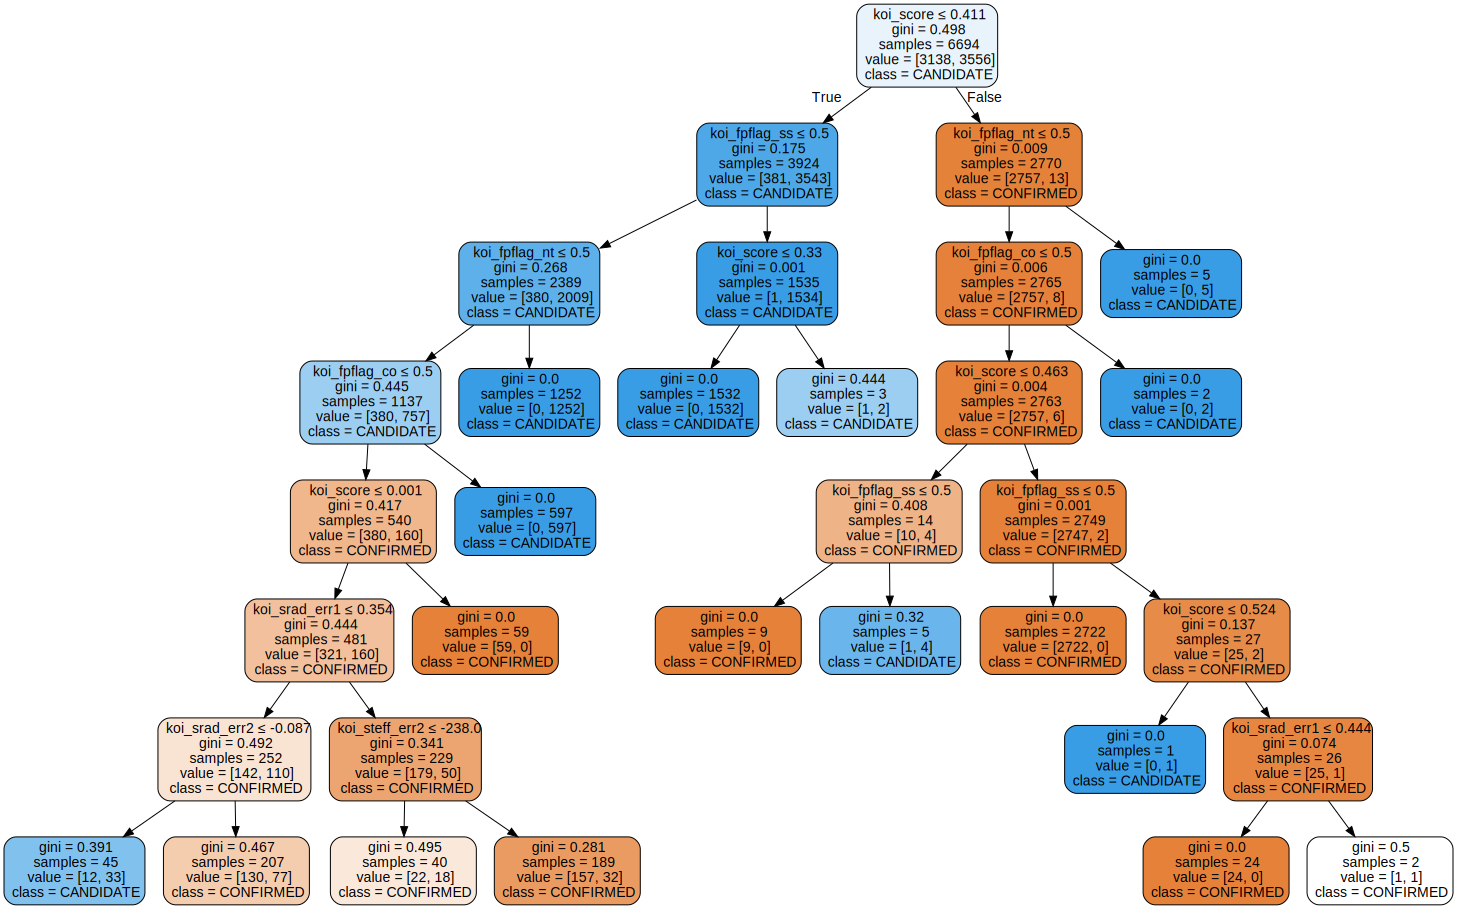

In [27]:
dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=features,
                     class_names=['CONFIRMED','CANDIDATE'],
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [ ]:
import pickle

filename = 'decision_tree_gridsearch_model.pkl'

pickle.dump(model, open(filename, 'wb'))